Scenario Stress Testing (Monte Carlo Shocks)

**Business Context:** Strategic planning requires understanding how key metrics behave under certainty. Scenario stress testing uses Monte Carlo simulations to model the impact of random shocks on business outcomes such as revenue, conversion rate, or churn.

**Question:** How do business metrics respond to random shocks, and what thresholds indicate strategic risk?

**Approach:**
- Simulate metric trajectories using Monte Carlo methods
- Introduce random shocks with varying intensity and frequency
 - Visualize multiple paths and define risk thresholds

 **Keywords:** Monte Carlo simulation, stress testing, scenario planning, risk management

In [1]:
# --- Notebook Setup & Imports ---
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
INITIAL_REVENUE = 100000
MU = 0.01              
SIGMA = 0.05           
T = 52                 
N = 500                
dt = T / N
t = np.linspace(0, T, N)
NUM_SIMULATIONS = 50


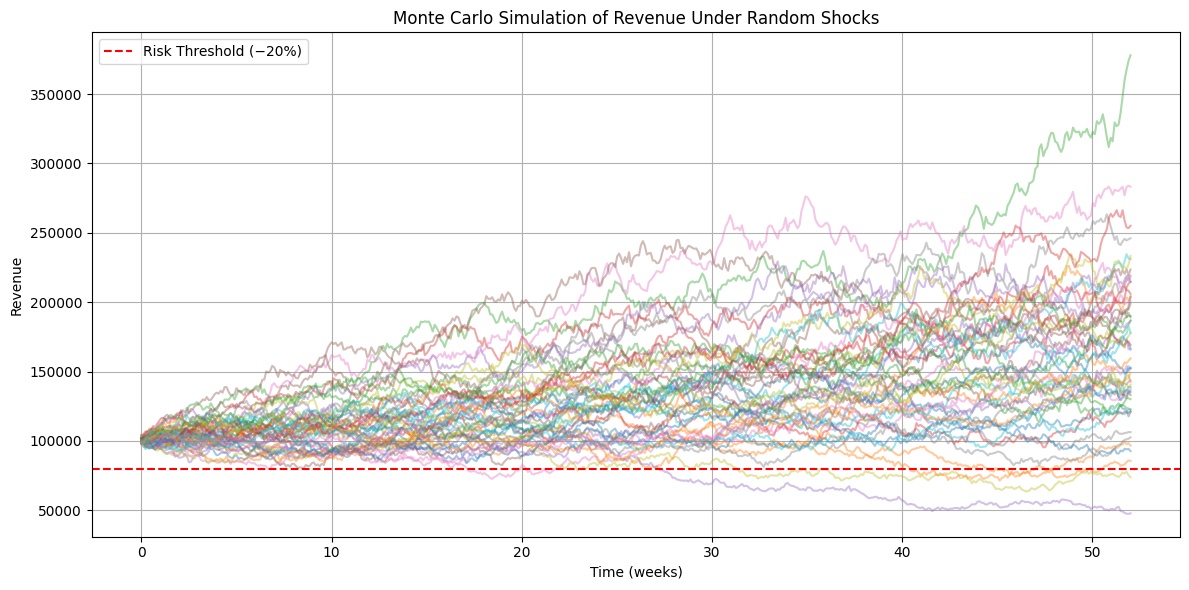

In [2]:
# --- Monte Carlo Simulation Function ---
def simulate_revenue(mu, sigma, R0, dt, N, num_paths):
    paths = np.zeros((num_paths, N))
    for i in range(num_paths):
        shocks = np.random.normal(loc=(mu - 0.5 * sigma**2) * dt, scale=sigma * np.sqrt(dt), size=N)
        paths[i] = R0 * np.exp(np.cumsum(shocks))
    return paths

# --- Run Simulation ---
revenue_paths = simulate_revenue(MU, SIGMA, INITIAL_REVENUE, dt, N, NUM_SIMULATIONS)

# --- Plot Results ---
plt.figure(figsize=(12, 6))
for path in revenue_paths:
    plt.plot(t, path, alpha=0.4)
plt.axhline(INITIAL_REVENUE * 0.8, color='red', linestyle='--', label='Risk Threshold (−20%)')
plt.title('Monte Carlo Simulation of Revenue Under Random Shocks')
plt.xlabel('Time (weeks)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

--- Executive Summary & Strategic Recommendation ---

**Strategic Insight:**
- **Revenue** trajectories under random shocks show high variability
- **Monte Carlo** stress testing reveals potential downside scenarios
- **A 20% drop** threshold identifies paths requiring strategic intervention
- **Recommendation** Use Monte Carlo simulations to assess risk exposure, define revenue thresholds to trigger contigency plans. Finally integrate stress testing into quarterly planning and budgetting

**Actionable Guidance:**
- Run scenario stress tests regularly to evaluate resilience
- Use simulation outputs to inform capital allocation and risk buffers
- Monitor metrics that fall below defined thresholds and escalate response
- Customize shock parameters (μ, σ) based on industry volatility and historical data
